In [66]:
from __future__ import division
import matplotlib
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
from PIL import Image
import math
import time
import numpy as np
from torchvision.transforms import ToTensor

In [67]:
def ncc(image1, kernel):

    kernel = kernel - kernel.mean()

    image = np.pad(image1, (((kernel.shape[0]-1), (kernel.shape[0]-1)), ((kernel.shape[1]-1), (kernel.shape[1]-1))), mode='constant')

    height_c = image1.shape[0]+kernel.shape[0]-1
    width_c = image1.shape[1]+kernel.shape[1]-1

    c = np.full([height_c, width_c], 0, dtype = float)

    for i in range(c.shape[0]):
        for j in range(c.shape[1]):
            subimage = image[i:i+kernel.shape[0],j:j+kernel.shape[1]]
            mean = float(np.sum(subimage)/(kernel.shape[0]*kernel.shape[1]))
            subimage = subimage - mean
            normfactor = math.sqrt(np.sum(np.square(subimage))*np.sum(np.square(kernel)))
            c[i][j] = (np.tensordot(subimage, kernel, axes = ((0, 1), (0, 1))))/normfactor

    #plots
    fig, (ax_orig, ax_template, ax_corr) = plt.subplots(1, 3)
    
    ax_orig.imshow(image, cmap='gray')
    ax_orig.set_title('Original')
    ax_orig.set_axis_off()
    
    ax_template.imshow(kernel, cmap='gray')
    ax_template.set_title('Template')
    ax_template.set_axis_off()
    
    ax_corr.imshow(c)
    ax_corr.set_title('Cross-correlation')
    ax_corr.set_axis_off()
    
    y, x = np.unravel_index(np.argmax(c), c.shape)
    ax_orig.plot(x+kernel.shape[1]//2, y+kernel.shape[0]//2, 'r+')
#     ax_orig.plot(x, y, 'ro')
#     fig.show()
    
    rect = matplotlib.patches.Rectangle((x,y),
                             kernel.shape[1],kernel.shape[0],linewidth=1,
                             edgecolor='r',facecolor='none')
    
    ax_orig.add_patch(rect)
    
    return c

In [69]:
img = Image.open("01041.png")
img = np.array(img.convert('L'))

crop = img[60:300, 40:110]
#crop = img.crop(box=(40, 60, 110, 300))
#crop = np.array(crop.convert('L'))

<class 'PIL.PngImagePlugin.PngImageFile'>


1.0000000000000002
Wall time: 30.1 s


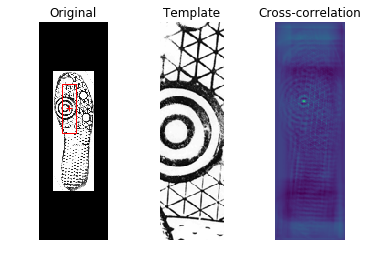

In [70]:
%%time
c = ncc(img, crop)
print(np.amax(c))